In [1]:
import tensorflow as tf

print(tf.__version__)


2.0.0


In [2]:
import pandas as pa
from pandas import  DataFrame

#pa.DataFrame()

#pa.DataFrame()

def is_normal(x):
    if 'normal' in x:
        return 0
    return 1

df = pa.read_csv('MIT_train.csv', index_col=0, header=None)
df_t = df.T

df_t.rename(columns={ df_t.columns[0]: 'label' }, inplace=True)
df_t['label'] = df_t['label'].map(is_normal)

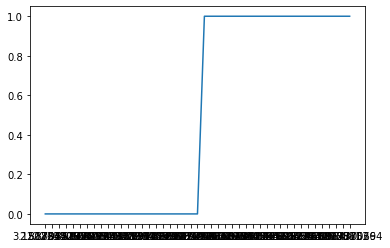

In [3]:
import matplotlib.pyplot as plt

plt.plot(df_t['1891_at'], df_t['label'])

In [6]:
# 开始做PCA，数据量太多了，先做一下初步筛选

import numpy as np
from sklearn.decomposition import PCA

feature = df_t.iloc[:,1:]
x = feature.to_numpy()
pca = PCA(n_components = 0.95, svd_solver='full')
pca.fit(x)
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_)


#X_new = pca.transform(x)
#plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
#plt.show()

# pca降纬之后，无法将数据映射到原始数据上，无法做到初筛的作用，做一下L2或者L1正则筛选吧


22
[124.84753664  11.8607721    9.04558349   5.65881212   3.93087449
   3.31414961   3.04431602   2.79495064   2.2878143    2.01742127
   1.42779518   1.3439474    1.21190728   1.12296175   1.04864907
   0.96091421   0.91083228   0.87807471   0.81535827   0.77902769
   0.72160295   0.67650707]


In [3]:
from sklearn.utils import shuffle

df_t = shuffle(df_t)

df_t_train = df_t.iloc[0:35,:]
df_t_test = df_t.iloc[36:,:]

df_t.iloc[:,0].shape

df_t.values

#help(tf.data.Dataset.from_tensor_slices)

#tf_dataset_train = tf.data.Dataset.from_tensor_slices((result[:,1:], result[:,0]))
#tf_dataset_test = tf.data.Dataset.from_tensor_slices((df_t_test.iloc[:,1:], df_t_test.iloc[:,0]))
#tf_dataset_train

array([[0, '6.726129004', '7.111715104', ..., '5.063003129',
        '4.348894108', '2.813525861'],
       [0, '6.688122081', '7.014784513', ..., '6.319268231',
        '4.295732839', '2.817704101'],
       [1, '6.977264563', '6.968452083', ..., '5.165237312',
        '4.225963312', '2.88305449'],
       ...,
       [0, '7.040041306', '7.2003841', ..., '5.146513019', '4.065217492',
        '3.543356933'],
       [0, '6.937444442', '7.499483284', ..., '5.170762476',
        '5.156587633', '2.835959674'],
       [1, '7.053045873', '7.114303311', ..., '4.688267281',
        '4.47190557', '3.376957948']], dtype=object)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


df1 = pa.read_csv('MIT_train.csv', index_col=0, header=0)
df_t1 = df1.T
c = df_t1.apply(lambda x: 0 if 'normal' in x.name else 1, axis=1)
df_t1.insert(0,'label',df_t1.apply(lambda x: 0 if 'normal' in x.name else 1, axis=1))
#df_t1


# 需要normalize，接下来才能看出
def normalize_frame(df):
    for column in df.columns:
        if column == 'label':
            continue
        max = df[column].max()
        min = df[column].min()
        df[column] = (df[column]-min)/(max-min+0.000001)

# 先把normalize给移除了，然后再筛选特征看看
#normalize_frame(df_t1)
#df_t1

train, test = train_test_split(df_t1, test_size=0.2)
#train, val = train_test_split(train, test_size=0.2)

def df_to_dataset(dataframe, shuffle=True, batch_size=20):
  dataframe = dataframe.copy()
  labels = dataframe.pop('label')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

batch_size = 3 # 小批量大小用于演示
train_ds = df_to_dataset(train, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

df_t1


,label,100_g_at,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,...,1890_at,1891_at,1892_s_at,1893_s_at,1894_f_at,1895_at,1896_s_at,1897_at,1898_at,1899_s_at
N01__normal.CEL,0,6.739604,7.604763,3.855478,3.114714,5.330804,4.975712,7.088371,3.046593,7.284370,...,5.962031,3.150766,4.693253,3.810585,4.824703,4.311568,3.184980,5.932086,4.692038,2.593003
N03__normal.CEL,0,7.147893,7.231789,4.308989,3.677606,6.246814,5.507128,5.321714,3.565579,7.161892,...,5.978913,2.818345,5.838279,5.256814,11.231804,3.098660,3.751960,4.626664,4.458467,3.549870
N05__normal.CEL,0,7.118826,7.125734,4.335536,3.837893,6.165789,5.555040,5.236251,3.358966,6.840134,...,6.109088,2.870722,5.796813,4.654103,10.822006,2.883674,3.802836,4.679325,4.677085,3.316095
N10__normal.CEL,0,7.068365,7.362399,3.980968,3.615704,6.375616,5.418049,5.153668,3.366020,7.052828,...,6.031740,2.754427,5.521374,5.182254,10.589624,3.167794,3.595172,5.089448,4.621129,3.117431
N13__normal.CEL,0,6.924614,7.389152,4.229428,3.716646,6.348648,5.657052,5.248014,3.450350,7.259543,...,6.143935,2.955303,5.823389,5.153644,10.907029,3.360082,3.701212,4.810830,4.514083,3.643828
N15__normal.CEL,0,7.001522,7.274283,3.943489,3.324857,6.085860,5.417754,5.282207,3.313669,6.837411,...,5.991195,2.851778,5.590509,4.807106,10.574374,3.174331,3.682752,4.791565,4.504072,3.649564
N17__normal.CEL,0,7.157825,7.399109,4.188910,3.874284,6.605696,5.686447,5.377143,3.673322,7.074936,...,6.268875,2.984422,5.898108,5.542979,11.581301,3.093086,3.783131,4.880986,4.770297,3.339316
N19__normal.CEL,0,6.995051,7.163852,3.950154,3.514473,6.342602,5.760823,5.254661,3.223888,6.964349,...,6.019188,2.964000,5.735065,5.153173,10.699603,3.137111,3.677049,4.380711,4.277370,3.340969
N21__normal.CEL,0,7.058193,7.407309,4.347466,3.431088,6.309386,5.728239,5.430829,3.531290,6.969948,...,5.710988,3.299974,5.866829,4.969918,10.988490,2.999694,3.729429,4.908222,4.280274,3.312612
N24__normal.CEL,0,6.635464,7.295818,3.693705,3.246910,6.051719,5.331838,6.714661,3.040024,7.174382,...,7.464770,2.817860,5.144569,4.288231,8.084989,3.395379,3.361997,4.473363,4.511724,3.046913


In [5]:
# 构建模型 && 训练

#1.创建feature特征
from tensorflow.keras import layers,models
feature_columns = []

for feature in df_t1.columns:
    if feature == 'label':
        continue
    feature_columns.append(tf.feature_column.numeric_column(feature))
   #print(feature)


#2.构建模型

tf.keras.backend.set_floatx('float64')
tf.keras.backend.set_floatx('float32')
model = tf.keras.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='ftrl',
              loss='binary_crossentropy',
              metrics=['AUC'])
#model.build()



model.fit(train_ds,
          validation_data=test_ds,
          epochs=20)

model.summary()





If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/20
12/12 [==============================] - 35s 3s/step - loss: 0.9488 - AUC: 0.5417 - val_loss: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 2/20
12/12 [==============================] - 1s 113ms/step - loss: 0.7983 - AUC: 0.5015 - val_loss: 0.7347 - val_AUC: 0.9000
Epoch 3/20
12/12 [==============================] - 1s 99ms/step - loss: 0.6547 - AUC: 0.6944 - val_loss: 0.7499 - val_AUC: 0.7750
Epoch 4/20
12/12 [==============================] - 1s 101ms/step - loss: 0.7961 - AUC: 0.4846 - val_loss: 

In [6]:
import numpy as np

layers1 = model.layers

weights = layers1[1].get_weights()



# 最后一个是bias,所以就筛选出l2最大的特征
x =np.abs(weights[0])

df = pa.DataFrame(x)
df.rename(columns={0:'value'})
df['name'] = df_t1.columns[1:]

df.columns = ['value','name']



dfa = df.sort_values('value', ascending=False)

#dfa.head(1000)

dfa




,value,name
828,5.277038e-03,174_s_at
826,3.903285e-03,1738_at
196,3.538968e-03,1178_at
218,3.117367e-03,1199_at
891,3.112034e-03,1797_at
...,...,...
937,6.039072e-06,1840_g_at
396,4.612398e-06,1368_at
509,3.220246e-06,1471_at
681,2.469209e-06,1606_at


In [39]:
# 筛选出10个特征，然后在精细的去处理,上面筛选出了10个特征，采用了l1正则
# 从上述操作中筛选出10个之后，按照循环法依次移除选择AUC最高的数据


# 第一步筛数据

df1 = pa.read_csv('MIT_train.csv', index_col=0, header=0)
df_t1 = df1.T
c = df_t1.apply(lambda x: 0 if 'normal' in x.name else 1, axis=1)
df_t1.insert(0,'label',df_t1.apply(lambda x: 0 if 'normal' in x.name else 1, axis=1))

df_t1

df_t2 = pa.DataFrame()

df_head = dfa.head(700)
for column in df_head['name']:
    df_t2[column] = df_t1[column]
    
df_t2['label']=df_t1['label']

df_t2




    

,174_s_at,1738_at,1178_at,1199_at,1797_at,1500_at,189_s_at,1804_at,184_at,1652_at,...,1146_at,148_at,1048_at,1136_at,1742_at,1353_g_at,1846_at,1334_s_at,1776_at,label
N01__normal.CEL,5.723413,5.231096,2.399893,7.520835,4.435978,2.708503,6.406725,12.736187,4.164260,5.575989,...,3.951506,3.647107,3.642060,5.474125,5.649548,4.287855,4.444868,6.643932,5.445052,0
N03__normal.CEL,4.283795,5.950668,2.880926,4.954647,5.079053,3.585761,6.475548,12.888413,4.372780,6.423131,...,4.892039,4.681756,4.106156,5.811003,6.528805,5.708206,3.781927,7.595979,5.413221,0
N05__normal.CEL,4.331630,5.988094,2.858987,5.301005,5.239154,3.838899,6.621426,11.706020,4.428306,6.482002,...,5.064082,4.739270,3.809966,5.454896,6.570102,5.618047,3.625515,7.371798,5.417040,0
N10__normal.CEL,4.728361,5.878168,2.602183,5.747527,4.854105,3.599050,6.637756,11.975363,4.452108,6.456316,...,4.987932,4.581780,4.072294,5.542444,6.352539,5.471078,3.656467,7.213636,5.483901,0
N13__normal.CEL,4.413831,5.920539,2.723305,4.939648,4.999728,3.726165,6.746047,9.059101,4.712495,6.534362,...,5.121990,4.709606,4.144164,5.555118,6.645370,5.849784,3.568930,7.495708,5.503736,0
N15__normal.CEL,5.017864,5.762040,2.778654,4.842733,4.956315,3.592165,6.620798,12.093145,4.444985,6.460033,...,4.921965,4.901370,3.868663,5.496000,6.513824,5.449667,4.007706,7.305290,5.275146,0
N17__normal.CEL,4.735939,6.258593,2.928311,4.592687,5.170613,3.397885,6.689705,7.760577,4.901488,6.753480,...,5.313670,4.929237,4.234940,5.678305,6.690537,5.750989,3.661644,7.575421,5.552260,0
N19__normal.CEL,4.465120,6.130928,2.785810,4.950917,4.987630,3.612348,6.563063,10.738952,4.542495,6.223069,...,5.142183,4.799301,3.931342,5.891286,6.568702,5.677904,3.403676,7.474958,5.247148,0
N21__normal.CEL,5.178873,5.920869,2.610632,4.835571,5.209355,3.608224,6.666132,12.432465,4.588863,6.597463,...,4.999403,4.660570,4.067166,5.293061,6.846600,5.777774,3.635457,7.496329,5.449326,0
N24__normal.CEL,5.220969,5.537119,2.623931,7.261132,4.683189,3.263653,6.253501,12.977449,4.132609,6.093571,...,4.432570,4.251823,3.863969,5.503035,6.250638,5.028913,3.119050,7.177189,5.306514,0


In [40]:
# 数据筛选完毕，然后搞一下模型，依次删除某一个特征

# 定义一个函数，输入数据，然后将列作为feature_column 然后构建lr模型来看哪个特征重要
def train_model(data):
    if data is None:
        return None
    if len(data.columns) == 0:
        return None
    feature_columns = []
    for feature in data.columns:
        if feature == 'label':
            continue
        feature_columns.append(tf.feature_column.numeric_column(feature))
    
    # 生成训练数据
    batch_size=2
    train, test = train_test_split(data, test_size=0.2)
    train_ds = df_to_dataset(train, batch_size=batch_size)
    test_ds = df_to_dataset(test, batch_size=batch_size)
    
    model = tf.keras.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns),
    tf.keras.layers.Dense(1, activation='sigmoid',kernel_regularizer='l1')
    ])
    model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['AUC'])

    model.fit(train_ds,
          validation_data=test_ds,
          epochs=25)
    auc = 0
    for m in model.metrics:
        if m.name == 'AUC':
            auc = m.result().numpy()
    return auc
    

df_t2 = shuffle(df_t2)
train_model(df_t2)
    


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/25
18/18 [==============================] - 31s 2s/step - loss: 21.8322 - AUC: 0.5913 - val_loss: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 2/25
18/18 [==============================] - 1s 60ms/step - loss: 35.6912 - AUC: 0.4690 - val_loss: 28.5775 - val_AUC: 0.5000
Epoch 3/25
18/18 [==============================] - 1s 59ms/step - loss: 46.8161 - AUC: 0.3050 - val_loss: 95.4762 - val_AUC: 0.5000
Epoch 4/25
18/18 [==============================] - 1s 58ms/step - loss: 26.7796 - AUC: 0.5217 - val_lo

0.5

## 针对数据做一个分析，感觉数据模型的表现不太对


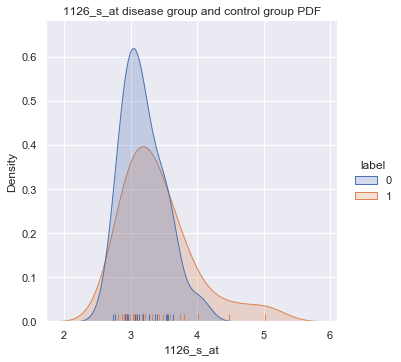

In [33]:
# 这个函数是用来画特征曲线使用的，把normal曲线和disease曲线
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib



#sns.set_theme(style="whitegrid")
sns.set_theme()

def plot_train(feature_name, dataset):
    '''
     feature_name : 特征名称
     dataset: 训练集合的dataFrame的全集
    '''
    if  dataset is None:
        return
    if feature_name is None:
        return
    # 获取最后正样本和负样本两种数据的差异
    #ax.set_title('{}患病和正常组的数据分布图'.format(feature_name))
    #f, ax= plt.subplots()
    g = sns.displot(dataset, x=feature_name, kind='kde', hue='label', fill=True, rug=True)
    #g.set_axis_labels('{}'.format(feature_name))
    #g.set_titles('ontrol group and disease group PDF',)
    #g.set_ylabels("control group and disease group PDF")
    g.ax.set_title(u'{} disease group and control group PDF'.format(feature_name))
    g.savefig("{}.png".format(feature_name))
    #sns.displot(disease_data,kind='kde')
    
plot_train('1126_s_at', df_t1)

#help(sns.displot)
#print(matplotlib.matplotlib_fname())
#print(matplotlib.get_cachedir())




## 通过上面的绘图可以看出，normal和disease的特征数据分布 如果一致说明不是重要特征

我们通常使用KL散度来衡量两个分布的相似性，同一个分布的KL散度是0，差别越大说明分布相差越大

$$kl(p|q) = -\Sigma{p_i*log(\frac{p_i}{q_i})} \tag{1}$$


In [27]:
from scipy.stats import entropy

#entropy([1/2, 1/2],[1/2, 1/2], base=2)

# 将指定特征的数据转化成数据分布
def array_to_dist(dataset, feature_name, label, step):
    # 左闭右开
    if dataset is None:
        return []
    
    min_val = min(dataset[feature_name])
    max_val = max(dataset[feature_name]) 
    
    #print('min:{}, max:{}'.format(min_val, max_val))
    val = np.linspace(min_val, max_val, num=step+1)
    val = val.tolist()
    #print('val:{}'.format(val))
    
    dist=[]
    deal_data = dataset.loc[dataset['label']==label]
    if deal_data is None:
        return []
    for i in range (step):
       # print('i:{},i+1:{}'.format(val[i], val[i+1]))
        x = deal_data.loc[(deal_data[feature_name]>=val[i]) & (deal_data[feature_name]<val[i+1])]
        val_size = 0.00001
        if len(x) != 0:
            val_size = len(x)
        dist.append(val_size)
    return dist
    

def kl_divergence(feature_name, dataset):
    '''
    计算feature_name对应的kl散度
    feature_name:特征名称
    dataset 数据集合
    面临一个问题，normal和disease两个数据长度不一致，需要对齐
    就算长度对齐也不对，需要进行分桶，计算好分布
    '''
    neg = array_to_dist(dataset, feature_name, 0, 20)
    pos = array_to_dist(dataset, feature_name, 1, 20)
    
    #print('neg:{},pos:{}'.format(neg, pos))
    return entropy(neg, pos, base = 2)


features =[]
feature_kl = []
for feature in df_t1.columns:
    if feature == 'label':
        continue
    features.append(feature)
    feature_kl.append(kl_divergence(feature, df_t1))

kl_feature_dataset = pa.DataFrame()
kl_feature_dataset['feature_name'] = features
kl_feature_dataset['kl_divergence'] = feature_kl
final = kl_feature_dataset.sort_values('kl_divergence', ascending=False)

final

    

#np.linspace(1.0, 3.3, num=11)

,feature_name,kl_divergence
314,1290_g_at,12.352356
860,1769_at,12.011306
562,1520_s_at,11.661252
823,1735_g_at,11.282389
379,1352_at,11.116233
...,...,...
881,1788_s_at,0.843575
940,1843_at,0.748581
118,1107_s_at,0.669373
780,1696_at,0.641458


In [36]:
final.head(50)

,feature_name,kl_divergence
314,1290_g_at,12.352356
860,1769_at,12.011306
562,1520_s_at,11.661252
823,1735_g_at,11.282389
379,1352_at,11.116233
654,160023_at,10.807886
432,1400_at,10.803560
581,1538_s_at,10.479341
280,1259_at,10.463105
819,1731_at,10.379011


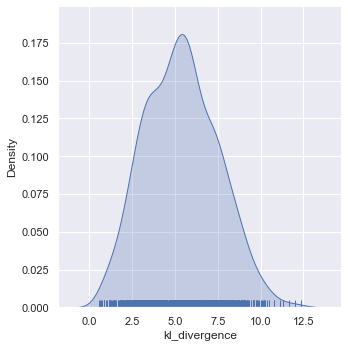

In [35]:
sns.displot(final, x='kl_divergence', kind='kde',  fill=True, rug=True)

In [43]:


df_kl = pa.DataFrame()

df_head = final.head(100)
for column in df_head['feature_name']:
    df_kl[column] = df_t1[column]
    
df_kl['label']=df_t1['label']

df_kl

df_kl = shuffle(df_kl)
train_model(df_kl)




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/25
18/18 [==============================] - 6s 334ms/step - loss: 4.2807 - AUC: 0.4491 - val_loss: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 2/25
18/18 [==============================] - 0s 12ms/step - loss: 7.1886 - AUC: 0.2747 - val_loss: 2.9529 - val_AUC: 0.5000
Epoch 3/25
18/18 [==============================] - 0s 12ms/step - loss: 5.8993 - AUC: 0.4429 - val_loss: 2.8965 - val_AUC: 0.5000
Epoch 4/25
18/18 [==============================] - 0s 12ms/step - loss: 5.8189 - AUC: 0.4352 - val_loss: 

0.85